<a href="https://colab.research.google.com/github/Oussamayousre/DLL/blob/main/feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from scipy.spatial import distance as dist
from imutils.video import FileVideoStream
from imutils.video import VideoStream
from imutils import face_utils
import numpy as np
import argparse
import imutils
import time
import dlib
import cv2

In [3]:
def eye_aspect_ratio(eye):
	# compute the euclidean distances between the two sets of
	# vertical eye landmarks (x, y)-coordinates
	A = dist.euclidean(eye[1], eye[5])
	B = dist.euclidean(eye[2], eye[4])
	# compute the euclidean distance between the horizontal
	# eye landmark (x, y)-coordinates
	C = dist.euclidean(eye[0], eye[3])
	# compute the eye aspect ratio
	ear = (A + B) / (2.0 * C)
	# return the eye aspect ratio
	return ear

In [4]:
EYE_AR_THRESH = 0.3
EYE_AR_CONSEC_FRAMES = 3
# initialize the frame counters and the total number of blinks
COUNTER = 0
TOTAL = 0

In [5]:
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2021-07-24 16:36:20--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  70.7MB/s    in 0.9s    

2021-07-24 16:36:21 (70.7 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [6]:
!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

datFile =  "/content/shape_predictor_68_face_landmarks.dat"

In [7]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(datFile)


In [8]:
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

In [9]:
print("[INFO] starting video stream thread...")
vs = FileVideoStream("/content/gdrive/MyDrive/DataBase/Fold1_part1/02/0.mov").start()
fileStream = True
# vs = VideoStream(src=0).start()
# vs = VideoStream(usePiCamera=True).start()
# fileStream = False
time.sleep(1.0)

[INFO] starting video stream thread...


In [18]:
from google.colab.patches import cv2_imshow
ear = []

while True:
	# if this is a file video stream, then we need to check if
	# there any more frames left in the buffer to process
	if not vs.more():
		break
	# grab the frame from the threaded video file stream, resize
	# it, and convert it to grayscale
	# channels)
	frame = vs.read()
	frame = imutils.resize(frame, width=450)
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
	# detect faces in the grayscale frame
	rects = detector(gray, 0)
	for rect in rects:
    
		# determine the facial landmarks for the face region, then
		# convert the facial landmark (x, y)-coordinates to a NumPy
		# array
		shape = predictor(gray, rect)
		shape = face_utils.shape_to_np(shape)
		# extract the left and right eye coordinates, then use the
		# coordinates to compute the eye aspect ratio for both eyes
		leftEye = shape[lStart:lEnd]
		rightEye = shape[rStart:rEnd]
		leftEAR = eye_aspect_ratio(leftEye)
		rightEAR = eye_aspect_ratio(rightEye)
		# average the eye aspect ratio together for both eyes
		EAR.append((leftEAR + rightEAR) / 2.0 )
    
		# compute the convex hull for the left and right eye, then
		# visualize each of the eyes
		leftEyeHull = cv2.convexHull(leftEye)
		rightEyeHull = cv2.convexHull(rightEye)
		#cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
		#cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
		# check to see if the eye aspect ratio is below the blink
		# threshold, and if so, increment the blink frame counter
    
		if (leftEAR + rightEAR) / 2.0 < EYE_AR_THRESH:
			COUNTER += 1
		# otherwise, the eye aspect ratio is not below the blink
		# threshold
		else:
			# if the eyes were closed for a sufficient number of
			# then increment the total number of blinks
			if COUNTER >= EYE_AR_CONSEC_FRAMES:
				TOTAL += 1
			# reset the eye frame counter
			COUNTER = 0
		# draw the total number of blinks on the frame along with
		# the computed eye aspect ratio for the frame
		#cv2.putText(frame, "Blinks: {}".format(TOTAL), (10, 30),
			#cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
		#cv2.putText(frame, "EAR: {:.2f}".format(ear), (300, 30),
			#cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
	# show the frame
	#cv2_imshow(cv2_imshow(cv2.resize(frame, (800, 600))))
	key = cv2.waitKey(1) & 0xFF
  
	# if the `q` key was pressed, break from the loop
	if key == ord("q"):
		break
# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()

AttributeError: ignored

In [44]:
ear = np.array(EAR)
print(len(EAR))
ear.reshape(ear.shape[0])
np.arange(1, 20,1/len(EAR))

18231


array([ 1.        ,  1.00005485,  1.0001097 , ..., 19.99983545,
       19.9998903 , 19.99994515])

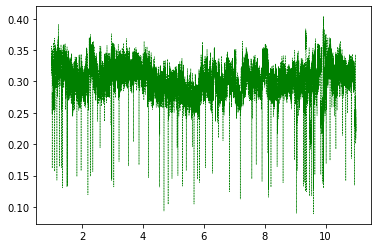

In [90]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1, 11,10/len(EAR)),ear, color='green', linestyle='dashed', linewidth =0.5,
          markerfacecolor='blue', markersize=2)

In [209]:
ear

array([0.33368881, 0.34346101, 0.32522927, ..., 0.21999696, 0.23868087,
       0.23374435])

In [259]:
from scipy.signal import argrelextrema

index_peak = argrelextrema(ear, np.less)
index_peak = np.asarray(index_peak)[0]
index_peak


array([    2,     9,    13, ..., 18223, 18225, 18228])

In [271]:
index_peak_blink = np.array([])


In [272]:
for i in index_peak : 
  
  if EAR[i] < 0.3 : 
    
    index_peak_blink = np.append(index_peak_blink , i)
index_peak_blink = index_peak_blink.astype(np.int64)

In [281]:
def start_check(blink_index_list, ear) :
  start = np.array([] , dtype=np.int64)
  Bool = True 
  for i in blink_index_list : 
    Bool = True 
    j = i -1
    while Bool : 
      if ear[j] <= ear[j-1] :
        
        j -= 1

      else : 
       
        start = np.append(start,j)
        Bool = False 
  return start 
#start = np.array(start_check(index_peak_blink,EAR))
start = start_check(index_peak_blink,ear)  
start 



array([   18,    21,    23, ..., 18222, 18224, 18226])

In [282]:
def end_check(blink_index_list, ear) :
  
  end = np.array([] , dtype=np.int64)
  Bool = True 
  for i in blink_index_list : 
    Bool = True 
    j = i+1
    while Bool : 
      if ear[j] <= ear[j+1] :

        j += 1

      else : 
        end  = np.append(end , j)
        Bool = False 
  return end 
end = end_check(index_peak_blink,ear )
end
  

array([   21,    23,    27, ..., 18224, 18226, 18229])

In [283]:
Duration = end - start + 1
Duration

array([4, 3, 5, ..., 3, 3, 4])

In [284]:
Am = ear[end] - 2*ear[index_peak_blink] + ear[start] 
Ampl = Am / (end - start)
Ampl

array([0.03047799, 0.04594022, 0.02525445, ..., 0.00770885, 0.02103056,
       0.01805209])

In [147]:
Eye_Open_Speed = (ear[end] - ear[index_peak_blink])/()

3455

In [291]:
Frames_nmbr = np.arange(1 , len(ear)+1)
Freq = 100*(np.arange(1 , len(index_peak_blink)+1)/Frames_nmbr[index_peak_blink])
Freq

array([ 4.76190476,  8.69565217, 11.11111111, ..., 18.9475417 ,
       18.95094919, 18.95331614])